# AWS product review end-to-end pipeline

## 1. Load Datasets

In [1]:
import pandas as pd
from pyrecdp.datasets import amazon_product_review
train_data = amazon_product_review().to_pandas()

print("original input is ")
display(train_data)
train_data.dtypes

/usr/local/lib/python3.10/dist-packages/pyrecdp/datasets/amazon_product_review.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_table(self.saved_path, on_bad_lines='skip')


original input is 


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,25933450,RJOVP071AVAJO,0439873800,84656342,There Was an Old Lady Who Swallowed a Shell!,Books,5.0,0.0,0.0,N,Y,Five Stars,I love it and so does my students!,2015-08-31
1,US,1801372,R1ORGBETCDW3AI,1623953553,729938122,I Saw a Friend,Books,5.0,0.0,0.0,N,Y,"Please buy ""I Saw a Friend""! Your children wil...",My wife and I ordered 2 books and gave them as...,2015-08-31
2,US,5782091,R7TNRFQAOUTX5,142151981X,678139048,"Black Lagoon, Vol. 6",Books,5.0,0.0,0.0,N,Y,Shipped fast.,Great book just like all the others in the ser...,2015-08-31
3,US,32715830,R2GANXKDIFZ6OI,014241543X,712432151,If I Stay,Books,5.0,0.0,0.0,N,N,Five Stars,So beautiful,2015-08-31
4,US,14005703,R2NYB6C3R8LVN6,1604600527,800572372,Stars 'N Strips Forever,Books,5.0,2.0,2.0,N,Y,Five Stars,Enjoyed the author's story and his quilts are ...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236845,US,52004451,R2OUP8UJV6LEVO,B003ZX1EQS,381270854,"Teilhard De Chardin By Doran McCarty, Makers o...",Books,5.0,0.0,0.0,N,N,"A GENERALLY ""POSITIVE"" EVANGELICAL ASSESSMENT ...",Doran McCarty is professor of Christian minist...,2012-05-03
10236846,US,36099005,R34K82WIMNWJBL,0786652918,14254333,1: Mel Bay's Master Anthology of Jazz Guitar S...,Books,4.0,0.0,0.0,N,N,Good chord solo book for intermediate to advan...,The Mel Bay Master Anthology of Jazz Guitar So...,2012-05-03
10236847,US,38081951,R3JHG8BPWJVN6S,1608981215,331746774,The Punk Ethic,Books,4.0,0.0,1.0,N,N,A delicious afternoon read,There is something about Timothy Decker's THE ...,2012-05-03
10236848,US,53040283,R3EOQVV7MU668R,0670023418,184956679,Aunt Dimity and the Village Witch,Books,5.0,1.0,1.0,N,N,Really Enjoyed It,I really enjoyed this book. It is a type of my...,2012-05-03


marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object

## 2. create pipeline for training

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /bert-base-multilingual-cased/resolve/main/vocab.txt (Caused by ProxyError('Cannot connect to proxy.', TimeoutError('timed out')))' thrown while requesting HEAD https://huggingface.co/bert-base-multilingual-cased/resolve/main/vocab.txt
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /bert-base-multilingual-cased/resolve/main/vocab.txt (Caused by ProxyError('Cannot connect to proxy.', TimeoutError('_ssl.c:980: The handshake operation timed out')))' thrown while requesting HEAD https://huggingface.co/bert-base-multilingual-cased/resolve/main/vocab.txt


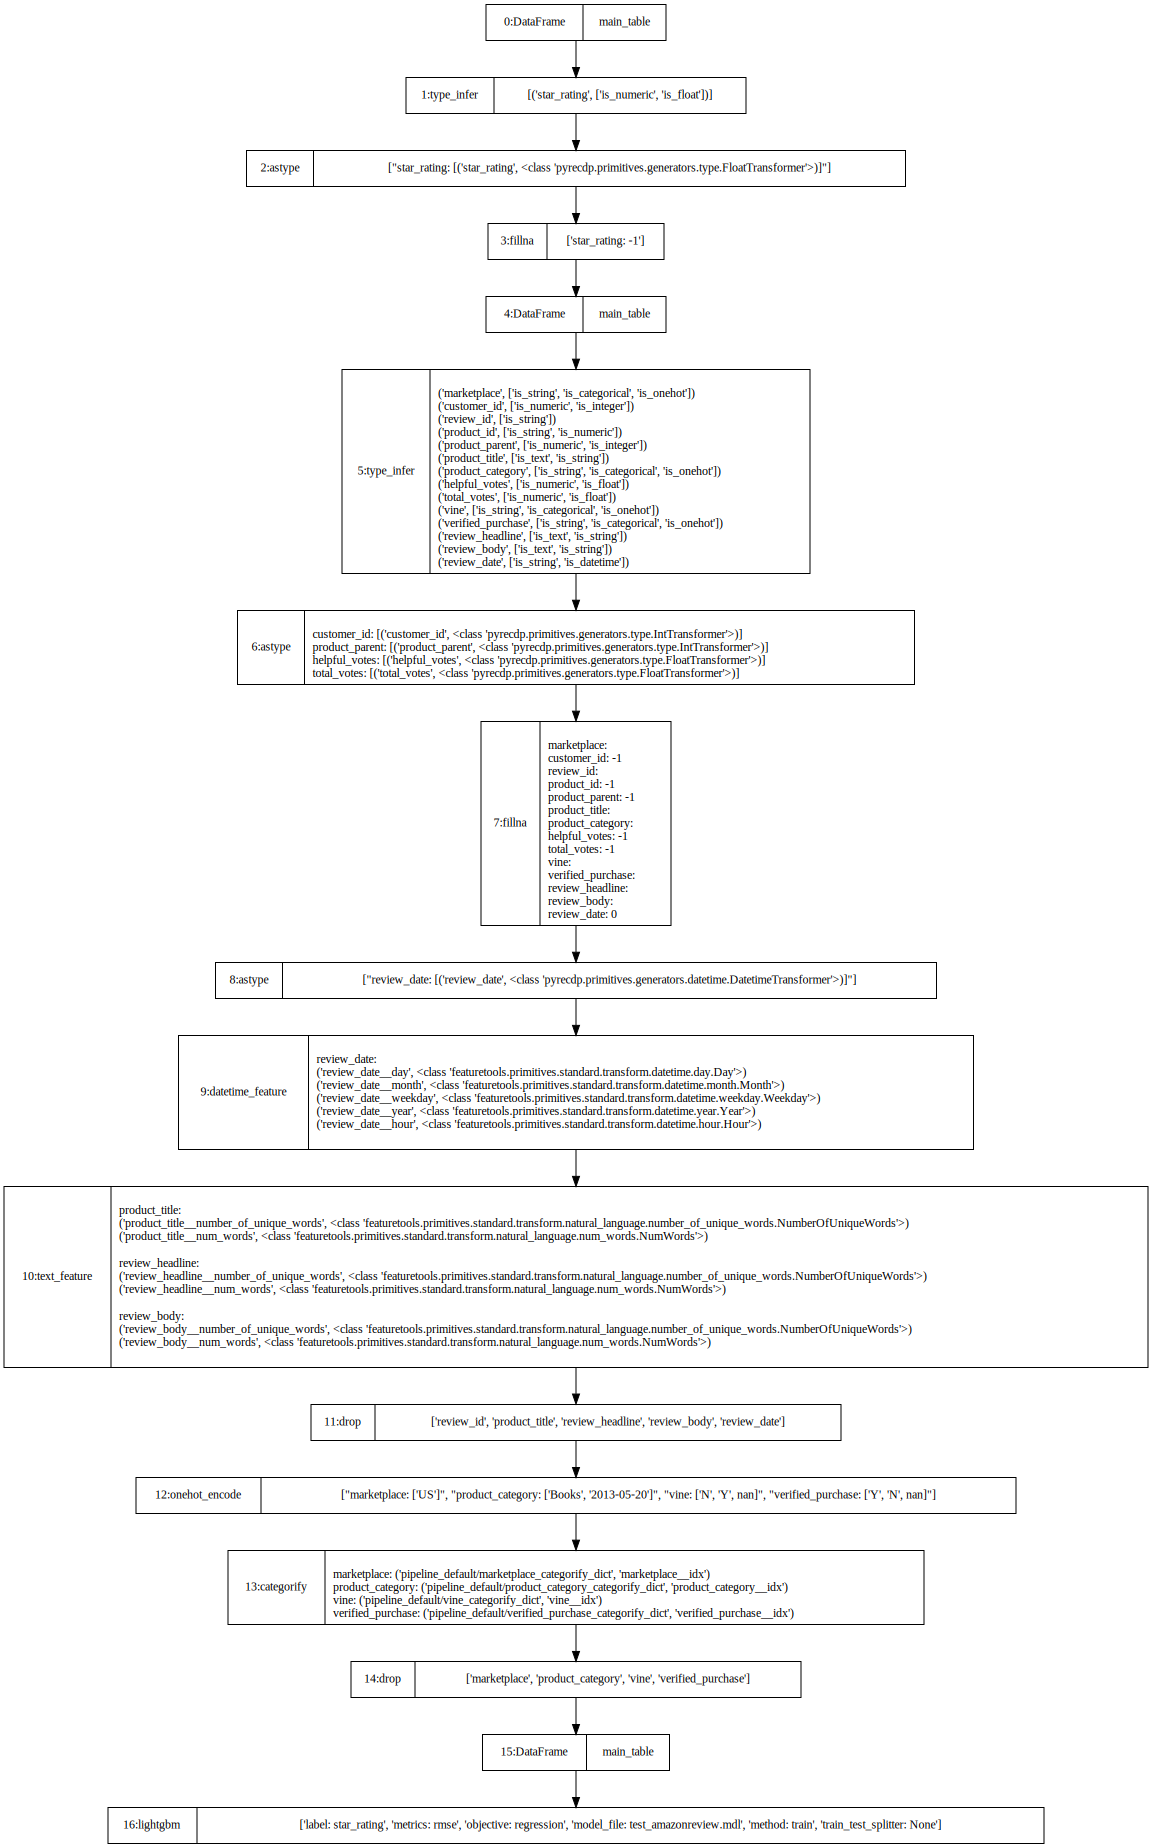

In [2]:
from pyrecdp.autofe import FeatureWrangler, DataEstimator

data_pipeline = FeatureWrangler(dataset=train_data, label="star_rating")
data_pipeline.plot()
config = {
    'model_file': 'test_amazonreview.mdl',
    'metrics': 'rmse', 
    'objective': 'regression', 
    'model_name': 'lightgbm'}
train_pipeline = DataEstimator(method = 'train', data_pipeline = data_pipeline, config = config)
train_pipeline.plot()

## 3. execute pipeline w/ spark

In [3]:
train_pipeline.fit_transform('spark')

Will assign 48 cores and 308502 M memory for spark
23/04/01 05:10:38 WARN Utils: Your hostname, sr414 resolves to a loopback address: 127.0.1.1; using 10.1.2.14 instead (on interface enp134s0f1)
23/04/01 05:10:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/01 05:10:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
per core memory size is 6.276 GB and shuffle_disk maximum capacity is 8589934592.000 GB
{0: DataFrame, 1: type_infer, 2: astype, 3: fillna, 4: DataFrame, 5: type_infer, 6: astype, 7: fillna, 8: astype, 9: datetime_feature, 10: text_feature, 11: drop, 12: onehot_encode, 13: categorify, 14: drop, 15: DataFrame, 16: lightgbm}
execute with spark started ...
append DataFrame
append type_infer
append DataFrameToRDDConverter
DataframeConvert partition pandas dataframe to spark RDD took 32.864 secs
append astype
append fillna
append DataFrame
append type_infer
append astype
append fillna
append astype
append datetime_feature
append text_feature
append drop
append onehot_encode
append RDDToDataFrameConverter


DataframeTransform took 79.338 secs, processed 10236817 rows with num_partitions as 200
DataframeTransform combine to one pandas dataframe took 1.272 secs
append categorify
append drop
append DataFrame
append lightgbm


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_w

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.453464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17472
[LightGBM] [Info] Number of data points in the train set: 9724976, number of used features: 24
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Start training from score 4.446989
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.926062
[200]	valid_0's rmse: 0.918831
[300]	valid_0's rmse: 0.915936
[400]	valid_0's rmse: 0.913739
[500]	valid_0's rmse: 0.911952
[600]	valid_0's rmse: 0.910555
[700]	valid_0's rmse: 0.909195
[800]	valid_0's rmse: 0.908127
[900]	valid_0's rmse: 0.907247
[1000]	valid_0's rmse: 0.906269
[1100]	valid_0's rmse: 0.905488
[1200]	valid_0's rmse: 0.90478
[1300]	valid_0's rmse: 0.904177
[1400]	valid_0's rmse: 0.903652
[1500]	valid_0's rmse: 0.90308
[1600]	valid_0's rmse: 0.902603
[1700]	valid_0's rmse: 0.902028
[1800]	valid_0's rmse: 0.901621
[1900]	valid_0's rmse: 0.901161
[2000]	valid_0's rmse: 0.900702
Did not meet early stopping. Best iteration is:
[2000]	valid_0's rmse: 0.900702
execute with spark took 525.3495058289263 sec


,customer_id,product_id,product_parent,star_rating,helpful_votes,total_votes,review_date__day,review_date__month,review_date__weekday,review_date__year,...,product_category__2013-05-20,product_category__Books,vine__N,vine__Y,verified_purchase__N,verified_purchase__Y,marketplace__idx,product_category__idx,vine__idx,verified_purchase__idx
0,25933450,4.398738e+08,84656342,5.0,0.0,0.0,31,8,0,2015,...,0,1,1,0,0,1,0.0,53.0,1.0,2.0
1,1801372,1.623954e+09,729938122,5.0,0.0,0.0,31,8,0,2015,...,0,1,1,0,0,1,0.0,53.0,1.0,2.0
2,5782091,-1.000000e+00,678139048,5.0,0.0,0.0,31,8,0,2015,...,0,1,1,0,0,1,0.0,53.0,1.0,2.0
3,32715830,-1.000000e+00,712432151,5.0,0.0,0.0,31,8,0,2015,...,0,1,1,0,1,0,0.0,53.0,1.0,1.0
4,14005703,1.604601e+09,800572372,5.0,2.0,2.0,31,8,0,2015,...,0,1,1,0,0,1,0.0,53.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236845,52004451,-1.000000e+00,381270854,5.0,0.0,0.0,3,5,3,2012,...,0,1,1,0,1,0,NaN,NaN,NaN,NaN
10236846,36099005,7.866529e+08,14254333,4.0,0.0,0.0,3,5,3,2012,...,0,1,1,0,1,0,NaN,NaN,NaN,NaN
10236847,38081951,1.608981e+09,331746774,4.0,0.0,1.0,3,5,3,2012,...,0,1,1,0,1,0,NaN,NaN,NaN,NaN
10236848,53040283,6.700234e+08,184956679,5.0,1.0,1.0,3,5,3,2012,...,0,1,1,0,1,0,NaN,NaN,NaN,NaN


## 4. export pipeline

In [4]:
data_pipeline.export('amazon_product_review_pipeline.json')

In [5]:
! cat amazon_product_review_pipeline.json

{
    "0": {
        "children": null,
        "op": "DataFrame",
        "config": "main_table"
    },
    "1": {
        "children": [
            0
        ],
        "op": "type_infer",
        "config": [
            [
                "star_rating",
                [
                    "is_numeric",
                    "is_float"
                ]
            ]
        ]
    },
    "2": {
        "children": [
            1
        ],
        "op": "astype",
        "config": {
            "star_rating": [
                [
                    "star_rating",
                    [
                        "pyrecdp.primitives.generators.type",
                        "FloatTransformer"
                    ]
                ]
            ]
        }
    },
    "3": {
        "children": [
            2
        ],
        "op": "fillna",
        "config": {
            "star_rating": -1
        }
    },
    "4": {
        "children": [
            3
        ],
        "op": "DataFrame